In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Cargamos en memoria el csv de logs. Para mayor detalle del schema acceder a https://ethereum-etl.readthedocs.io/en/latest/schema/
logs = pd.read_csv('logs.csv')

In [6]:
# Cargamos el csv de bloques
blocks = pd.read_csv('blocks.csv')

In [7]:
# Mergeamos los dataframes para obtener el timestamp de los bloques en logs.csv
logs_with_timestamp = pd.merge(logs, blocks[['number', 'timestamp']], left_on='block_number', right_on='number')

# Convertimos el timestamp en datetime
logs_with_timestamp['timestamp'] = pd.to_datetime(logs_with_timestamp['timestamp'], unit='s', utc=True)


In [8]:
# Tabla con el top 5 de addresses con mayor cantidad de logs generados
top_addresses = logs_with_timestamp['address'].value_counts().head(5)
top_addresses

0xDe09E74d4888Bc4e65F589e8c13Bce9F71DdF4c7    1715
0x4Fde2b04a18552fc388e9D4045cfb05A913D21D8    1310
0xdcb679Ac6C72d438e66D39f3FB3364dED7254FC9     577
0xD699CfAF9ed52985b52B1665452E5e5F5CF9fcF9     243
0x7444047Aa685de38a092395E273ef0A64331d8C5     142
Name: address, dtype: int64

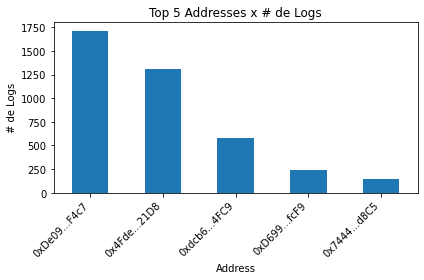

In [9]:
# Gráfico de barras con el top 5 de addresses
abbreviated_xtick_labels = [f'{address[:6]}...{address[-4:]}' for address in top_addresses.index]
top_addresses.plot(kind='bar')
plt.title('Top 5 Addresses x # de Logs')
plt.xlabel('Address')
plt.ylabel('# de Logs')
plt.xticks(ticks=range(len(top_addresses)), labels=abbreviated_xtick_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

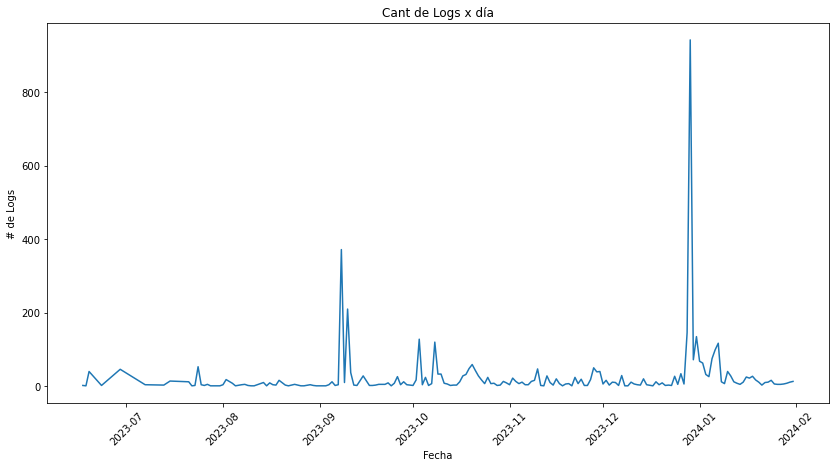

In [10]:
# Gráfico con la cantida de logs x dia 
logs_with_timestamp['date'] = logs_with_timestamp['timestamp'].dt.date
logs_per_day = logs_with_timestamp.groupby('date').size()
logs_per_day.plot(figsize=(14, 7))
plt.title('Logs per Day Over Time')
plt.title('Cant de Logs x día')
plt.xlabel('Fecha')
plt.ylabel('# de Logs')
plt.xticks(rotation=45)
plt.show()